# Music Dataset Analysis

In [1]:
import muspy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm, trange
import os
import pdb

In [2]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib
matplotlib.font_manager._rebuild()
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.size'] = 20
plt.rcParams['savefig.dpi'] = 120

In [3]:
from export_data import *

In [4]:
fpath = 'scottish-midi/'
file_list = os.listdir(fpath)
all_data = []
all_rolls = {}
for fname in tqdm(file_list):
    mus_in = muspy.read_midi(fpath+fname)
    all_data.append(describe_data(mus_in))
    all_rolls[fname[:-4]],_ = music_to_proll(mus_in)

100%|██████████| 136/136 [00:09<00:00, 14.73it/s]


In [5]:
pd.set_option('display.max_rows', None)
music_df = pd.DataFrame(data=all_data, columns=['title', 'tracks', 'min_note', 'max_note', 'duration', 'inst_nos', 'inst_names', 'n_drum', 'time_sig', 'tempo'])
music_df

,title,tracks,min_note,max_note,duration,inst_nos,inst_names,n_drum,time_sig,tempo
0,24medley,3,33,81,5023,"[71, 110, 112]","[reed, ethnic, ethnic]",0,2/4,90.000090
1,34medley,3,33,81,8610,"[71, 110, 112]","[reed, ethnic, ethnic]",0,3/4,94.000128
2,44medley,3,33,81,4879,"[71, 110, 112]","[reed, ethnic, ethnic]",0,4/4,97.000110
3,4marys,7,45,81,5208,"[8, 8, 8, 43, 8, 25, 25]","[piano, piano, piano, strings, piano, guitar, ...",0,3/4,120.000000
4,68medley,3,33,81,7543,"[71, 110, 112]","[reed, ethnic, ethnic]",0,6/8,139.000218
5,79thfare,7,36,79,7756,"[42, 24, -1, 1, 34, 24, 8]","[strings, organ, drums, piano, bass, organ, pi...",1,2/4,93.000042
6,afton,6,34,79,4992,"[1, 1, 26, 43, 26, 34]","[piano, piano, guitar, strings, guitar, bass]",0,3/4,110.000110
7,alandale,7,38,79,7776,"[24, 24, 1, 33, 49, 49, 26]","[organ, organ, piano, bass, ensemble, ensemble...",0,3/4,123.000221
8,alaurie,6,43,77,5016,"[1, 1, 43, 24, 24, 25]","[piano, piano, strings, organ, organ, guitar]",0,4/4,96.000000
9,amgrace,6,38,81,3528,"[71, 71, 110, 57, 59, 112]","[reed, reed, ethnic, brass, brass, ethnic]",0,3/4,60.000000


In [6]:
music_df.loc[music_df.time_sig=='9/8']

,title,tracks,min_note,max_note,duration,inst_nos,inst_names,n_drum,time_sig,tempo
110,rattlin,6,38,88,6372,"[74, 26, 25, 37, 26, 26]","[pipe, guitar, guitar, bass, guitar, guitar]",0,9/8,150.00000
115,ruinsa,6,38,81,5436,"[42, 8, 8, 69, 74, 43]","[strings, piano, piano, reed, pipe, strings]",0,9/8,90.00009


In [7]:
mus_valid = music_df.loc[((music_df.time_sig=='2/4') | (music_df.time_sig=='4/4') | (music_df.time_sig=='2/2'))]
len(mus_valid)

78

## Time Sigs

In [8]:
ts_val = mus_valid.time_sig.unique()
ts_count_val = [len(mus_valid.loc[mus_valid.time_sig==t]) for t in ts_val]

ts_all = music_df.time_sig.unique()
ts_count_all = [len(music_df.loc[music_df.time_sig==t]) for t in ts_all]

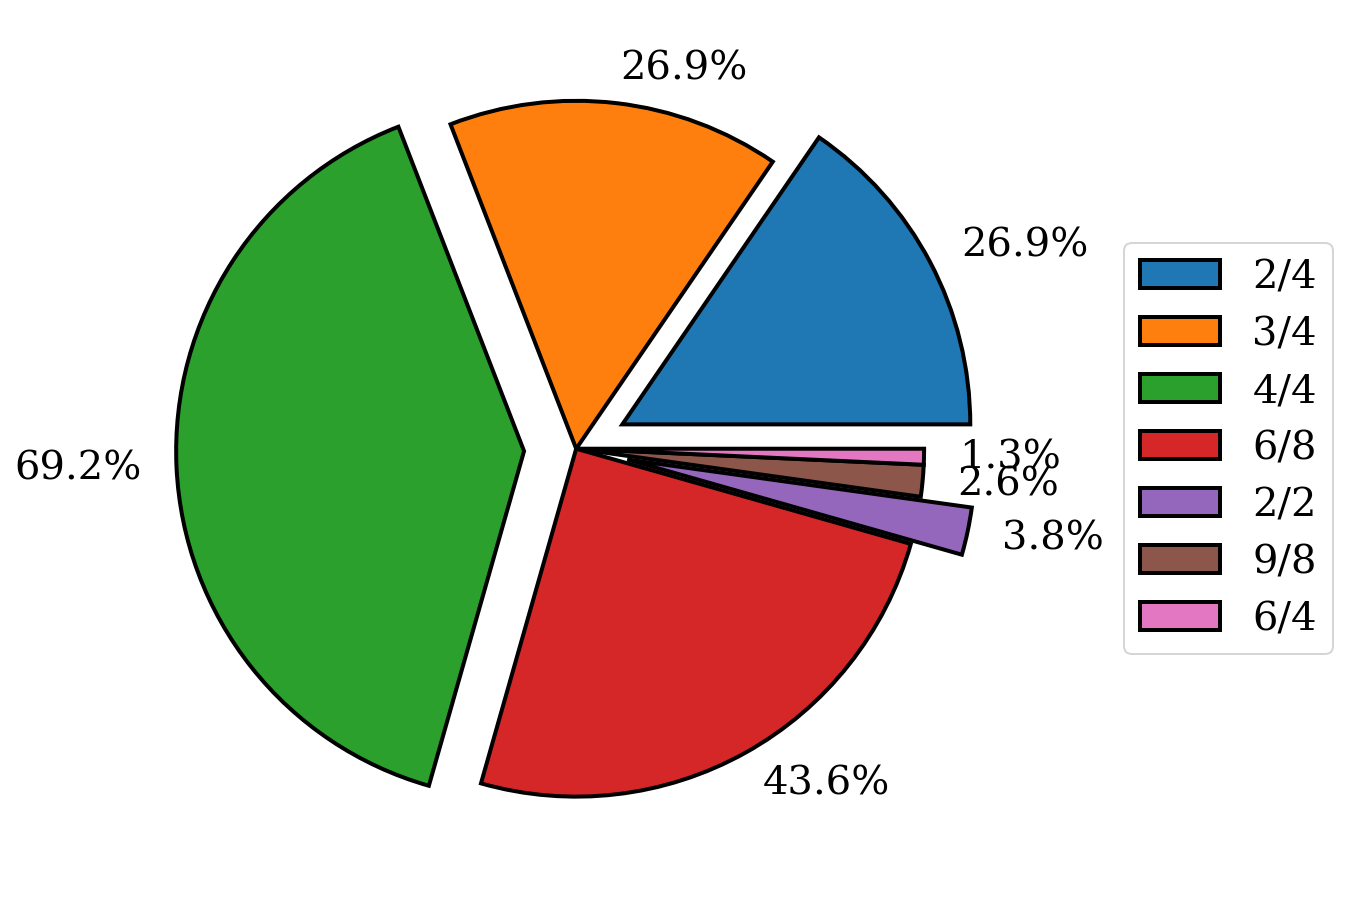

In [9]:
fig = plt.figure(figsize=(12,8))

props = np.round(100.*np.array(ts_count_all)/len(mus_valid),1)
pie_all = plt.pie(ts_count_all,labels=[str(p)+'%' for p in props],explode=(0.15,0,0.15,0,0.15,0,0),wedgeprops = {'linewidth': 2, 'edgecolor': 'k'})
plt.legend(ts_all,loc='center',bbox_to_anchor=(1, 0, 0.5, 1))

fname = 'pie_times.png'
plt.savefig(fname, bbox_inches='tight')

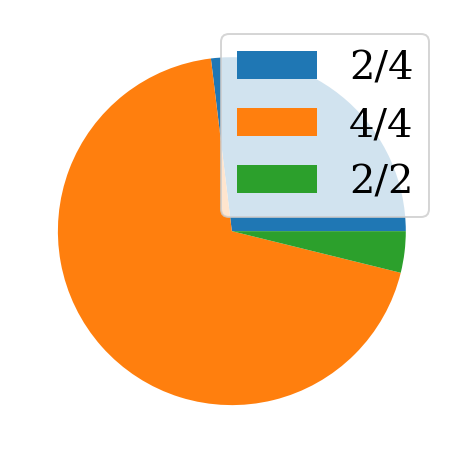

In [10]:
pie_val = plt.pie(ts_count_val)
plt.legend(ts_val)

## Notes

(array([ 3., 11.,  9., 13.,  9., 23.,  3.,  3.,  0.,  4.]),
 array([ 1596. ,  2450.8,  3305.6,  4160.4,  5015.2,  5870. ,  6724.8,
         7579.6,  8434.4,  9289.2, 10144. ]),
 <BarContainer object of 10 artists>)

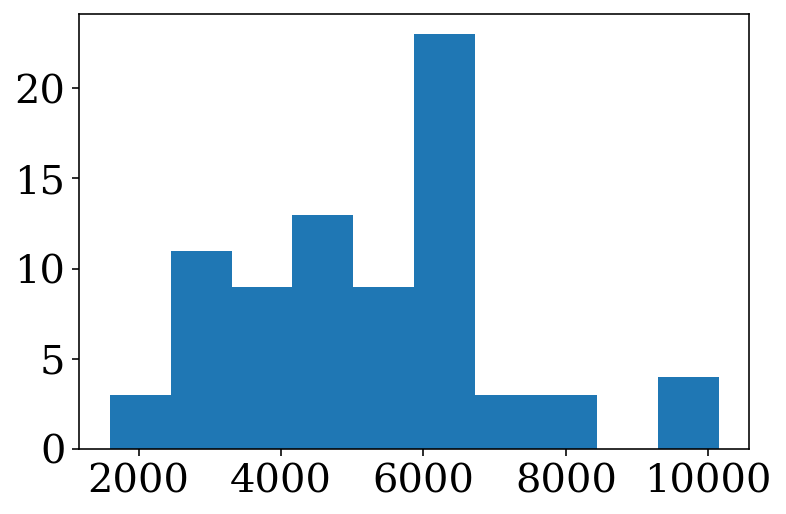

In [11]:
plt.hist(mus_valid.duration.values)

(array([ 2.,  5., 10.,  9., 16., 19.,  4.,  7.,  3.,  3.]),
 array([28. , 29.8, 31.6, 33.4, 35.2, 37. , 38.8, 40.6, 42.4, 44.2, 46. ]),
 <BarContainer object of 10 artists>)

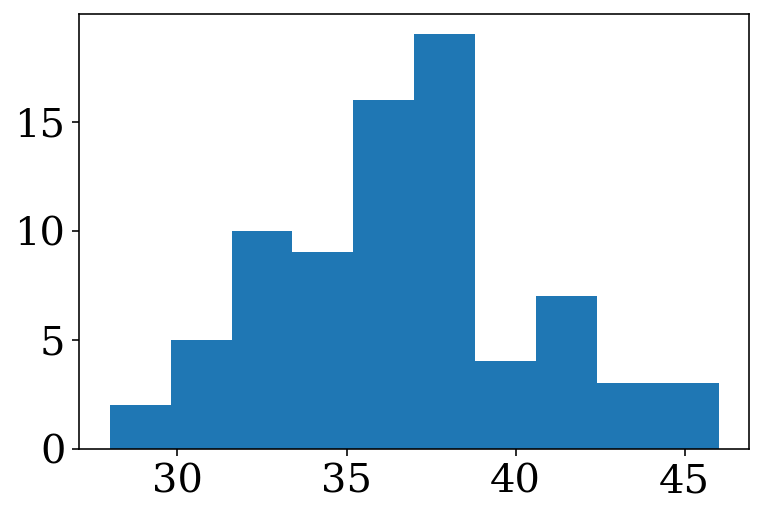

In [12]:
plt.hist(mus_valid.min_note.values)

(array([ 4.,  9., 25., 30.,  6.,  2.,  1.,  0.,  0.,  1.]),
 array([ 72. ,  75.3,  78.6,  81.9,  85.2,  88.5,  91.8,  95.1,  98.4,
        101.7, 105. ]),
 <BarContainer object of 10 artists>)

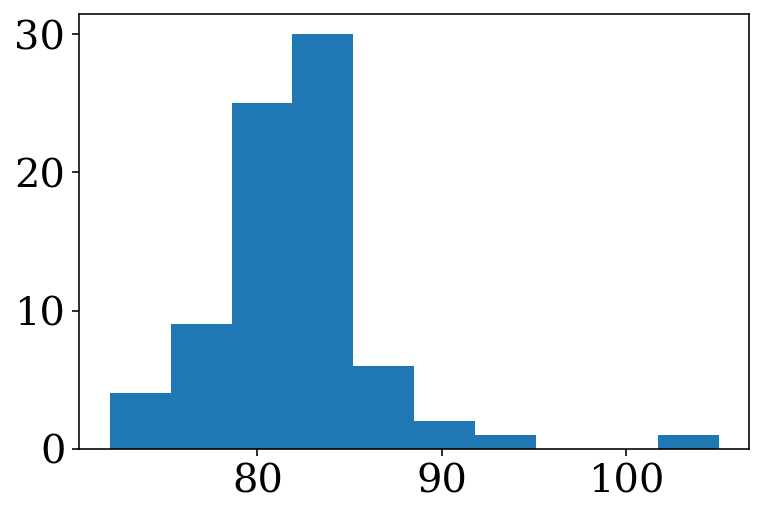

In [13]:
plt.hist(mus_valid.max_note.values)

## Tracks

In [14]:
track_inst, track_convert = f_track_converter()

In [15]:
all_inst_nos = mus_valid.loc[:,('title','inst_nos','tracks')].copy()
all_inst_nos['new_inst'] = all_inst_nos.inst_nos.apply(lambda x:[track_convert[i] for i in x])
for i, t_name in enumerate(track_inst):
    all_inst_nos[t_name] = all_inst_nos.new_inst.apply(lambda x:len(np.where(np.array(x)==i)[0]))
num_tracks = []
for i in all_inst_nos.index:
    num_tracks.append(len(np.where(all_inst_nos.loc[i,track_inst].values)[0]))
all_inst_nos['new_tracks'] = num_tracks

In [16]:
pd.set_option('display.max_rows', None)
all_inst_nos

,title,inst_nos,tracks,new_inst,Drums,Piano,Guitar,Bass,Strings,Wind,Accordion,Harp,new_tracks
0,24medley,"[71, 110, 112]",3,"[5, 5, 5]",0,0,0,0,0,3,0,0,1
2,44medley,"[71, 110, 112]",3,"[5, 5, 5]",0,0,0,0,0,3,0,0,1
5,79thfare,"[42, 24, -1, 1, 34, 24, 8]",7,"[4, 6, 0, 1, 3, 6, 1]",1,2,0,1,1,0,2,0,5
8,alaurie,"[1, 1, 43, 24, 24, 25]",6,"[1, 1, 3, 6, 6, 2]",0,2,1,1,0,0,2,0,4
10,annie,"[74, 22, 43, 1, 1, -1]",6,"[5, 6, 3, 1, 1, 0]",1,2,0,1,0,1,1,0,5
12,auldlang,"[42, 42, 43, 43, 26, 47, 49]",7,"[4, 4, 3, 3, 2, 7, 4]",0,0,1,2,3,0,0,1,4
13,auldlng2,"[23, 23, 26, 25, 33, 69, 74]",7,"[6, 6, 2, 2, 3, 5, 5]",0,0,2,1,0,2,2,0,4
15,barley,"[1, 1, 1, 33, -1]",5,"[1, 1, 1, 3, 0]",1,3,0,1,0,0,0,0,3
16,beauty,"[74, 43, 49, 1]",4,"[5, 3, 4, 1]",0,1,0,1,1,1,0,0,4
17,blakbear,"[1, 8, 1, 37, -1, 6]",6,"[1, 1, 1, 3, 0, 1]",1,4,0,1,0,0,0,0,3


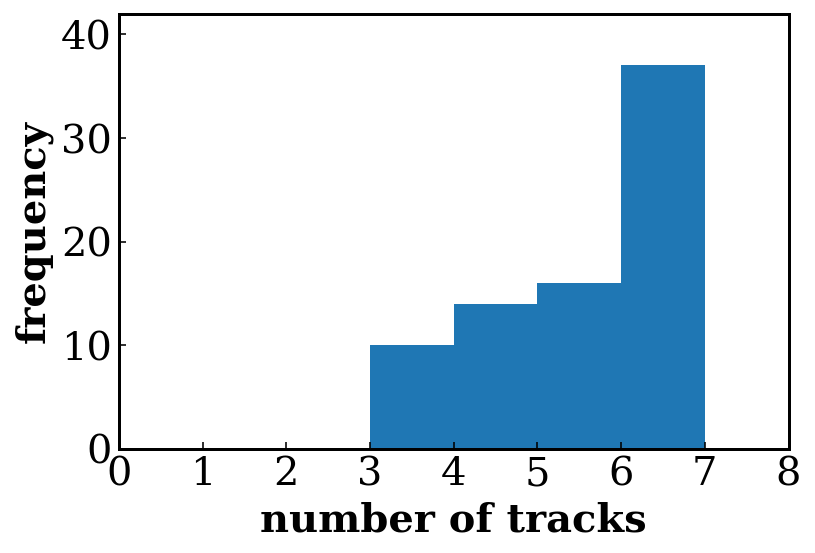

In [17]:
fig = plt.figure()
plt.hist(all_inst_nos.tracks.values,bins=np.arange(8))
plt.xlabel('number of tracks', fontweight='bold')
plt.ylabel('frequency', fontweight='bold')
plt.gca().set_xlim(left=0,right=8)
plt.ylim((0,42))
plt.xticks(np.arange(9), np.arange(9))

plt.setp(plt.gca().spines.values(), linewidth=1.5)
plt.tick_params(direction='in')

# fname = 'hist_track_data.png'
# plt.savefig(fname, bbox_inches='tight')

In [18]:
inst_mean = []
inst_min = []
inst_max = []
for t in track_inst:
    inst_mean.append(all_inst_nos[t].mean())
    inst_min.append(all_inst_nos[t].mean() - all_inst_nos[t].min())
    inst_max.append(all_inst_nos[t].max() - all_inst_nos[t].mean())

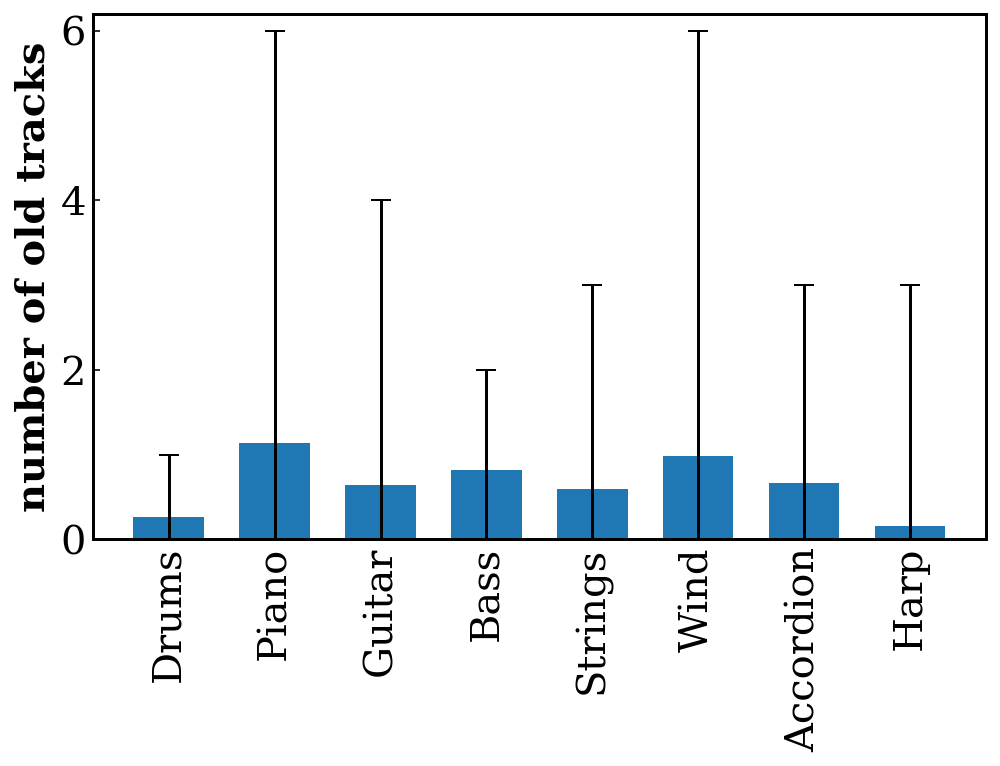

In [19]:
fig = plt.figure(figsize=(8,5))

plt.bar(np.arange(8)*1.2, inst_mean, yerr = [inst_min,inst_max], capsize = 5)
plt.ylim((0,6.2))

plt.ylabel('number of old tracks', fontweight='bold')
plt.setp(plt.gca().spines.values(), linewidth=1.5)
plt.tick_params(direction='in')

plt.xticks(np.arange(8)*1.2, track_inst, rotation = 'vertical')
plt.subplots_adjust(bottom=0.15)

# fname = 'n_track_old.png'
# plt.savefig(fname, bbox_inches='tight')

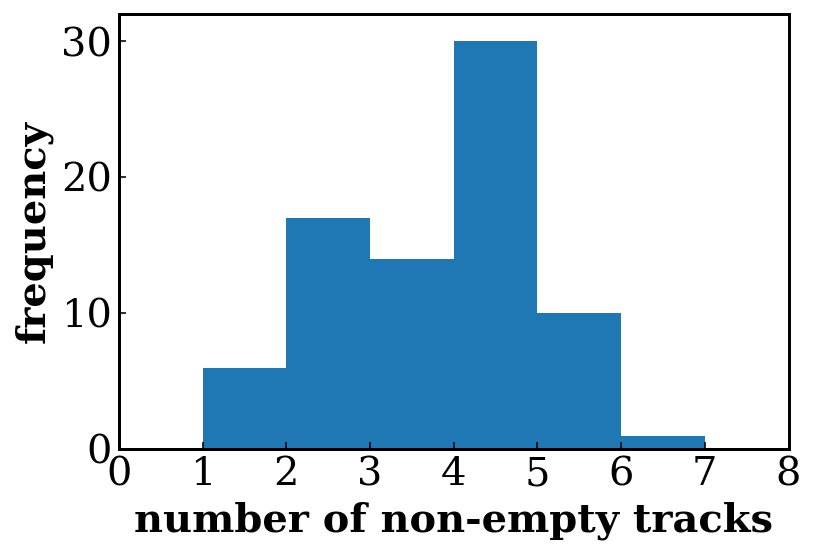

In [20]:
fig = plt.figure()
plt.hist(all_inst_nos.new_tracks.values,bins=np.arange(8))
plt.xlabel('number of non-empty tracks', fontweight='bold')
plt.ylabel('frequency', fontweight='bold')
plt.gca().set_xlim(left=0,right=8)
plt.ylim((0,32))
plt.xticks(np.arange(9), np.arange(9))

plt.setp(plt.gca().spines.values(), linewidth=1.5)
plt.tick_params(direction='in')

# fname = 'hist_track_old_update.png'
# plt.savefig(fname, bbox_inches='tight')

In [21]:
fpath = 'scottish-midi/'
track_data = []
for val in tqdm(all_inst_nos.loc[:,'title'].values):
    fname = val + '.mid'
    mus_in = muspy.read_midi(fpath+fname)
    track_data.append(balance_new_tracks(mus_in)[1])

100%|██████████| 78/78 [00:16<00:00,  4.80it/s]


In [22]:
n_inval = 0
for t in track_data:
    if np.any(np.array(t)>2):
        n_inval += 1
        print(np.where(np.array(t)>2))
n_inval

0

In [23]:
bal_inst_nos = mus_valid.loc[:,('title','tracks','inst_nos')].copy()
bal_inst_nos.loc[:,track_inst] = track_data
num_tracks = []
for i in bal_inst_nos.index:
    num_tracks.append(len(np.where(bal_inst_nos.loc[i,track_inst].values)[0]))

bal_inst_nos['new_tracks'] = num_tracks
bal_inst_nos

,title,tracks,inst_nos,Drums,Piano,Guitar,Bass,Strings,Wind,Accordion,Harp,new_tracks
0,24medley,3,"[71, 110, 112]",0,0,0,1,1,1,0,0,3
2,44medley,3,"[71, 110, 112]",0,0,0,1,1,1,0,0,3
5,79thfare,7,"[42, 24, -1, 1, 34, 24, 8]",1,2,0,1,1,0,2,0,5
8,alaurie,6,"[1, 1, 43, 24, 24, 25]",0,2,1,1,0,0,2,0,4
10,annie,6,"[74, 22, 43, 1, 1, -1]",1,2,0,1,0,1,1,0,5
12,auldlang,7,"[42, 42, 43, 43, 26, 47, 49]",0,1,1,2,2,0,0,1,5
13,auldlng2,7,"[23, 23, 26, 25, 33, 69, 74]",0,0,2,1,0,2,2,0,4
15,barley,5,"[1, 1, 1, 33, -1]",1,2,0,1,1,0,0,0,4
16,beauty,4,"[74, 43, 49, 1]",0,1,0,1,1,1,0,0,4
17,blakbear,6,"[1, 8, 1, 37, -1, 6]",1,2,1,1,1,0,0,0,5


In [24]:
inst_mean_bal = []
inst_min_bal = []
inst_max_bal = []
for t in track_inst:
    inst_mean_bal.append(np.mean(bal_inst_nos[t].values))
    inst_min_bal.append(bal_inst_nos[t].mean() - bal_inst_nos[t].min())
    inst_max_bal.append(bal_inst_nos[t].max() - bal_inst_nos[t].mean())

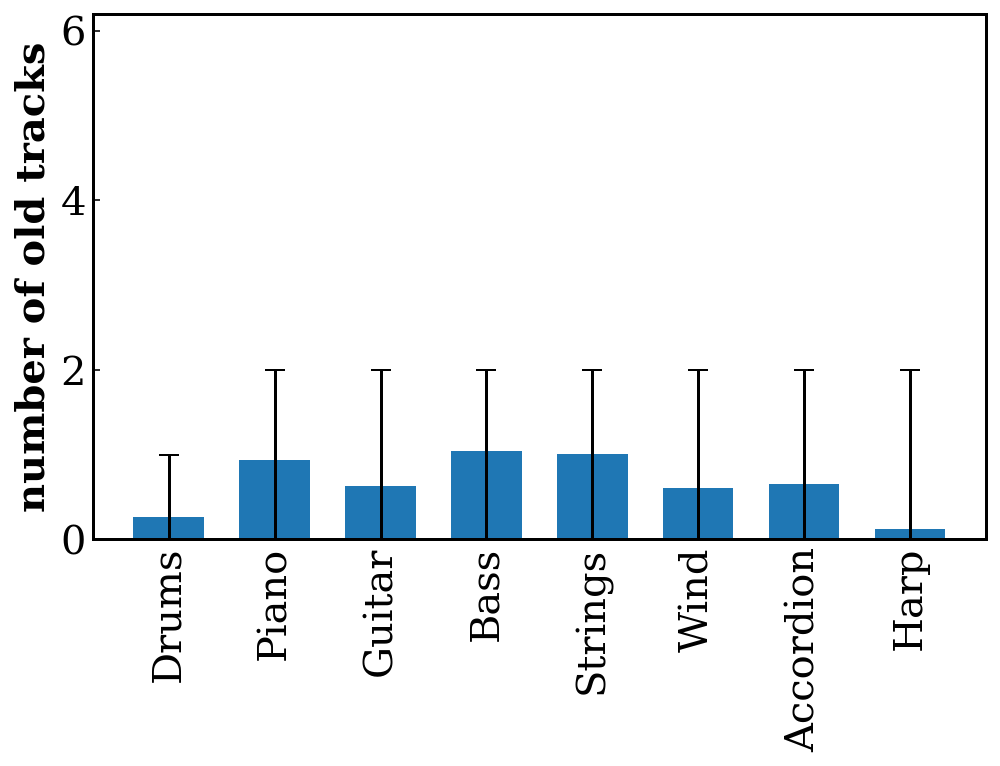

In [25]:
fig = plt.figure(figsize=(8,5))

plt.bar(np.arange(8)*1.2,inst_mean_bal,yerr = [inst_min_bal,inst_max_bal], capsize = 5)
plt.ylim((0,6.2))

plt.ylabel('number of old tracks', fontweight='bold')
plt.setp(plt.gca().spines.values(), linewidth=1.5)
plt.tick_params(direction='in')

plt.xticks(np.arange(8)*1.2, track_inst, rotation = 'vertical')
plt.subplots_adjust(bottom=0.15)

# fname = 'n_track_new.png'
# plt.savefig(fname, bbox_inches='tight')

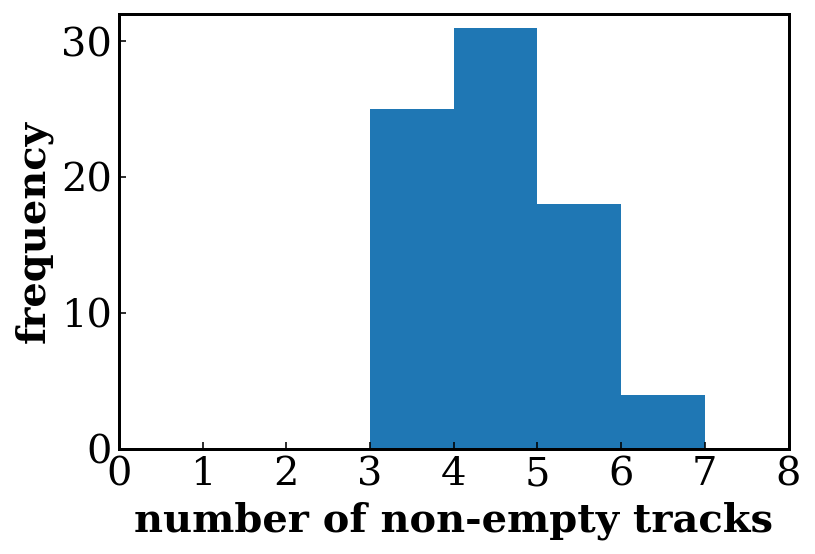

In [26]:
fig = plt.figure()
plt.hist(bal_inst_nos.new_tracks.values,bins=np.arange(8))
plt.xlabel('number of non-empty tracks', fontweight='bold')
plt.ylabel('frequency', fontweight='bold')
plt.gca().set_xlim(left=0,right=8)
plt.ylim((0,32))
plt.xticks(np.arange(9), np.arange(9))

plt.setp(plt.gca().spines.values(), linewidth=1.5)
plt.tick_params(direction='in')

# fname = 'hist_track_new_update.png'
# plt.savefig(fname, bbox_inches='tight')